# Titanic Survival Prediction using decision tree classifier

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The goal is to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, we will predict a 0 or 1 value for the Survived variable. We will apply the tools of machine learning to predict which passengers survived the tragedy.

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

Import train and test datasets

In [2]:
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')

# View first lines of training data
print (train.info())
train.head(n=5)

# View first lines of testing data
print (test.info())
test.head(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


All the missing values are filled with some meaningful value.

In [3]:
# train set
# Check for Null Values
train['Sex'].isnull().sum()
train['Pclass'].isnull().sum()
train['Fare'].isnull().sum()
train['Age'].isnull().sum()

# Fill the Null value with the median
train['Age']=train['Age'].fillna(train['Age'].median())

train['Age'].isnull().sum()

0

All the missing values are filled with some meaningful value. In test set, attributes Fare and Age contain few empty values. They are replaced by the median of all the values of Fare and Age test data respectively.

In [4]:
# test set
# Check for Null Values
test['Sex'].isnull().sum()
test['Pclass'].isnull().sum()
test['Fare'].isnull().sum()

# Fill the Null value with the median
test['Fare']=test['Fare'].fillna(test['Fare'].median())

test['Fare'].isnull().sum()

# Check for Null Value
test['Age'].isnull().sum()

# Fill the Null value with the median
test['Age']=test['Age'].fillna(test['Age'].median())

test['Age'].isnull().sum()

0

Initialize a dictionary to mark male as 0 and female as 1 and then apply dictionary to the column 'Sex'

In [5]:
d={'male':0,'female':1}

test['Sex']=test['Sex'].apply(lambda x:d[x])
train['Sex']=train['Sex'].apply(lambda x:d[x])

test['Sex'].head()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

Prediction - Plclass = 1 (First Class Passengers) are survived and Women are survived

In [12]:
target_column=['Survived']

test_columns=['PassengerId','Age','Pclass','Sex','Fare']

train_X=train[test_columns]
train_Y=train[target_column]


test['Survived'] = test.Pclass == 1

test['Survived'] = test.Sex == 1

In [13]:
train['Survived'] = train.Survived.apply(lambda x: int(x))
test['Survived'] = test.Survived.apply(lambda x: int(x))
test_X=test[test_columns]
test_Y=test[target_column]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, 
                                                    test_size=.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(712, 5)
(179, 5)


In [15]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_train)
print ("Accuracy on Training: ",classifier.score(train_X,train_Y))

classifier1 = DecisionTreeClassifier(max_depth=3)
classifier1.fit(x_test,y_test)
y_pred = classifier1.predict(x_test)

Accuracy on Training:  0.8237934904601572


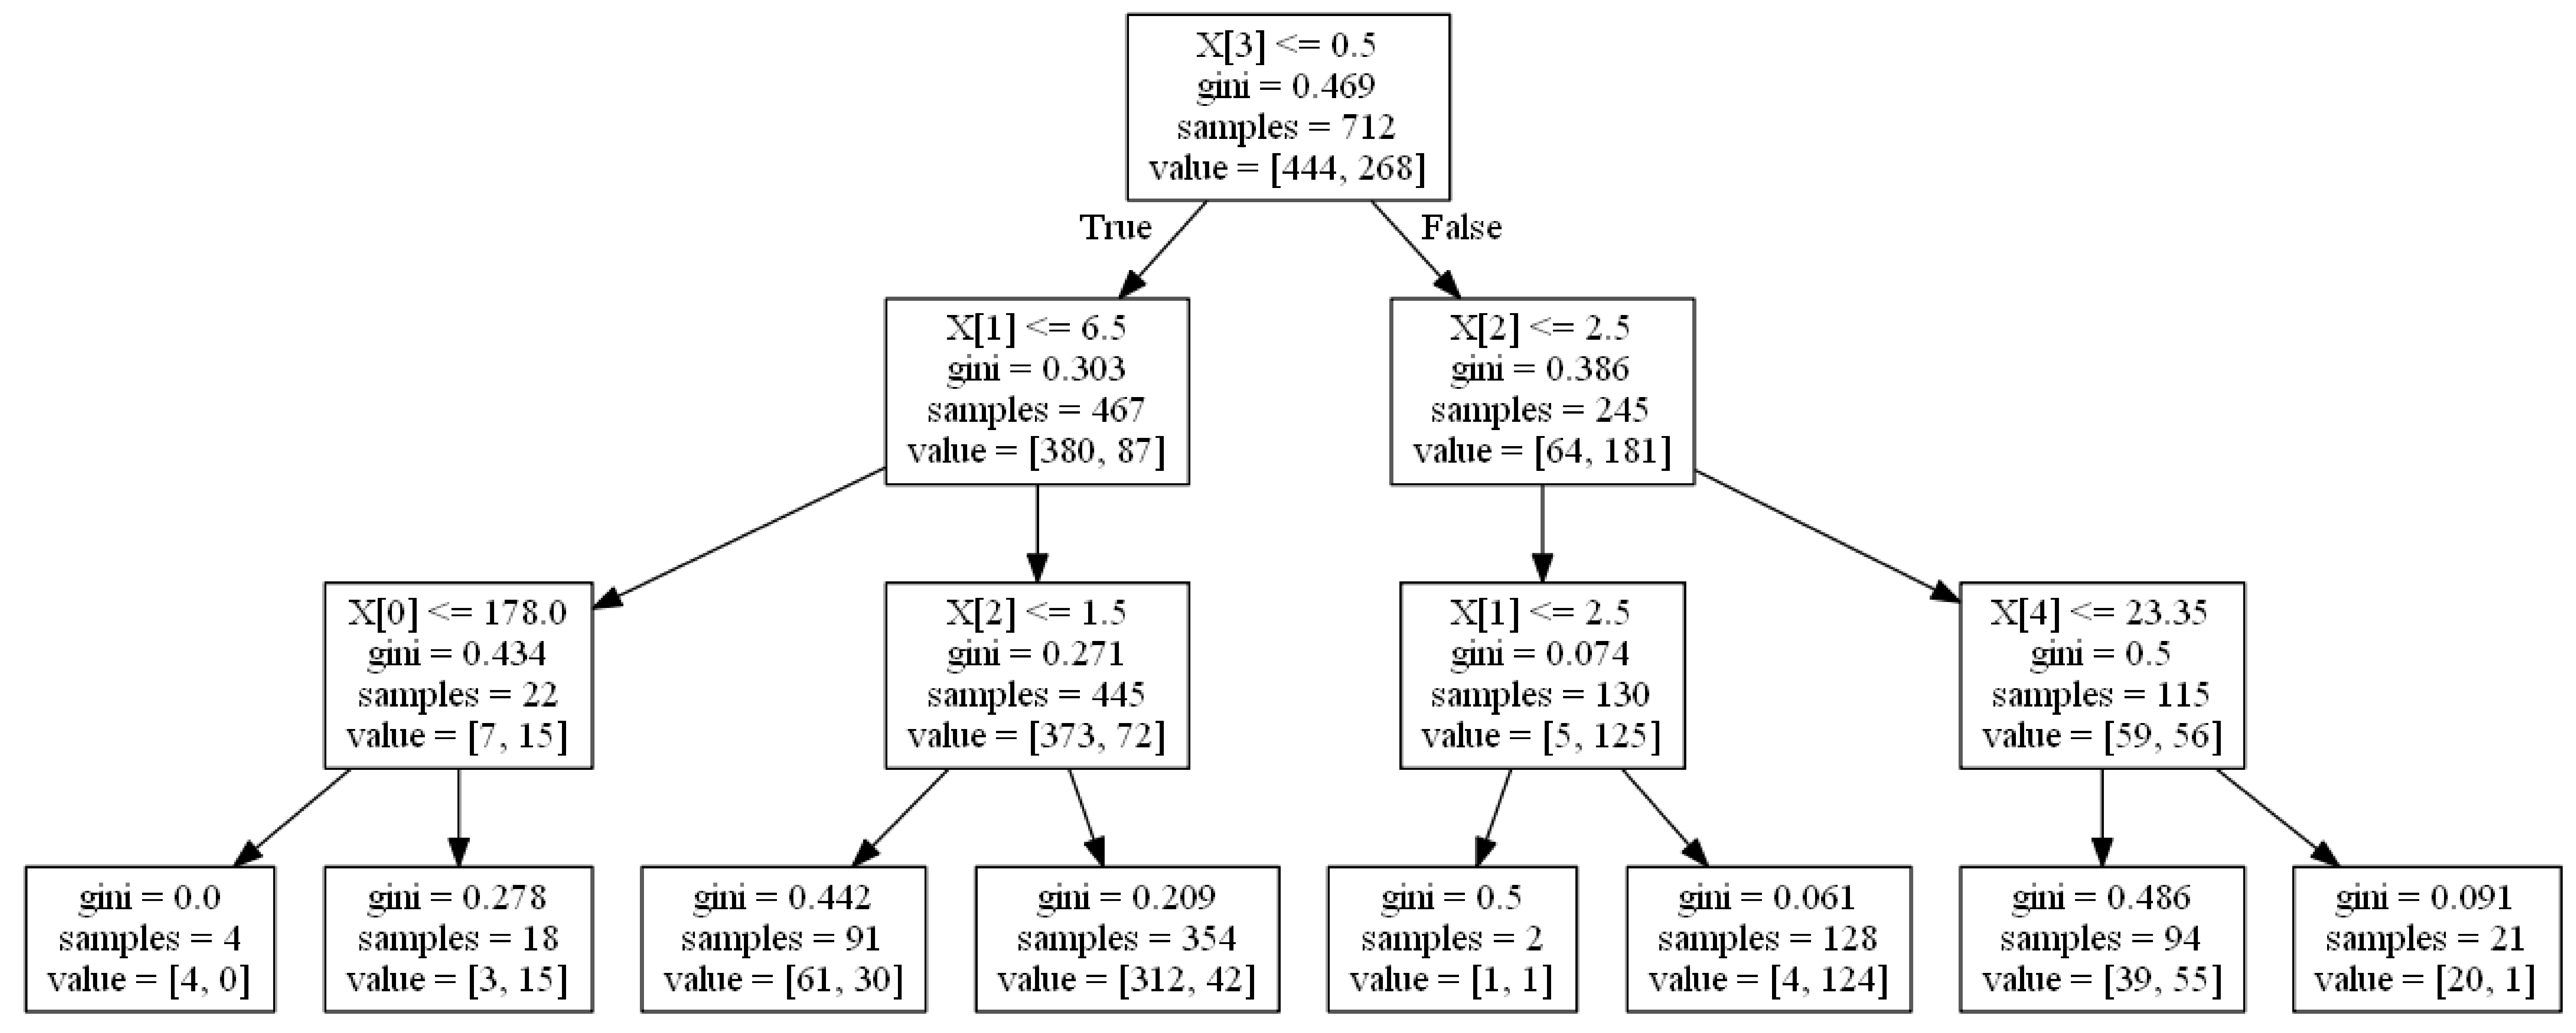

In [10]:
from io import StringIO
from sklearn import tree
#from graphviz import *

import matplotlib.image as mpimg
import pydotplus

dotfile = open("dtree.dot", 'w')
tree.export_graphviz(classifier, out_file = dotfile)
dotfile.close()
dot_data = StringIO()
tree.export_graphviz(classifier, out_file=dot_data)
graph = pydotplus.graph_from_dot_file("dtree.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(100, 100)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

The Decision Tree classifier is applied to entire training set and test set to get the final results of the given problem.

In [16]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(train_X,train_Y)

y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",classifier.score(train_X,train_Y))

classifier1 = DecisionTreeClassifier(max_depth=3)
classifier1.fit(test_X,test_Y)
test["Survived"] = classifier1.predict(test_X)

Accuracy on Training:  0.8237934904601572


Saving data trained with decision tree

In [17]:
test[['PassengerId', 'Survived']].to_csv('datasets/titanic/titanic_survival.csv', index=False)
print (test[['PassengerId', 'Survived']].head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
